# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [30]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [24]:
M_data=Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [25]:
k = 15
result = kmeans(M_data, k)

KmeansResult{Array{Float64,2},Float64,Int64}([529727.2826086957 418641.7881619938 … 167727.38805970148 293840.2265625; 196171.24637681158 784815.2336448599 … 348147.6 182348.953125], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [3.932068355740967e9, 3.848989170432373e9, 7.995064249267578e7, 6.902876748818359e8, 2.0012318050158691e9, 6.095935751503906e8, 1.3812885645126953e9, 1.9057899489746094e6, 4.318575461277832e9, 1.7479023515625e6  …  6.565364133713867e9, 1.5593985659379395e10, 7.847017496307129e9, 5.044867716490723e9, 1.9863866012949707e10, 6.584118918919922e9, 4.614242416956055e9, 9.517660579140137e9, 2.0390386133444824e10, 3.5149924892348633e9], [138, 321, 298, 367, 651, 408, 212, 327, 316, 335, 610, 213, 341, 335, 128], [138, 321, 298, 367, 651, 408, 212, 327, 316, 335, 610, 213, 341, 335, 128], 2.129246672606289e13, 16, true)

In [27]:
data[!, :cluster] = string.(assignments(result));

In [28]:
result.centers

2×15 Array{Float64,2}:
 529727.0  418642.0  606058.0  398962.0  …  244655.0  167727.0  293840.0
 196171.0  784815.0  574532.0  412121.0     847642.0  348148.0  182349.0

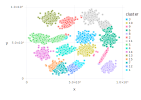

In [31]:
plot(data, x="x", y="y", color="cluster", Geom.point)